In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("C:/AsteriaHotel/veriset.xlsx")
df

,Date,Doluluk
0,2020-01-01,39.782929
1,2020-01-02,48.236961
2,2020-01-03,51.483678
3,2020-01-04,45.423077
4,2020-01-05,45.556486
...,...,...
1881,2025-02-24,38.162311
1882,2025-02-25,32.076951
1883,2025-02-26,30.370516
1884,2025-02-27,31.815874


In [4]:
df.index = pd.to_datetime(df["Date"])
df

,Date,Doluluk
Date,,
2020-01-01,2020-01-01,39.782929
2020-01-02,2020-01-02,48.236961
2020-01-03,2020-01-03,51.483678
2020-01-04,2020-01-04,45.423077
2020-01-05,2020-01-05,45.556486
...,...,...
2025-02-24,2025-02-24,38.162311
2025-02-25,2025-02-25,32.076951
2025-02-26,2025-02-26,30.370516


In [5]:
df = df.drop('Date', axis=1)
df

,Doluluk
Date,
2020-01-01,39.782929
2020-01-02,48.236961
2020-01-03,51.483678
2020-01-04,45.423077
2020-01-05,45.556486
...,...
2025-02-24,38.162311
2025-02-25,32.076951
2025-02-26,30.370516


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
df['Doluluk'] = scaler.fit_transform(df[['Doluluk']])

<Axes: xlabel='Date'>

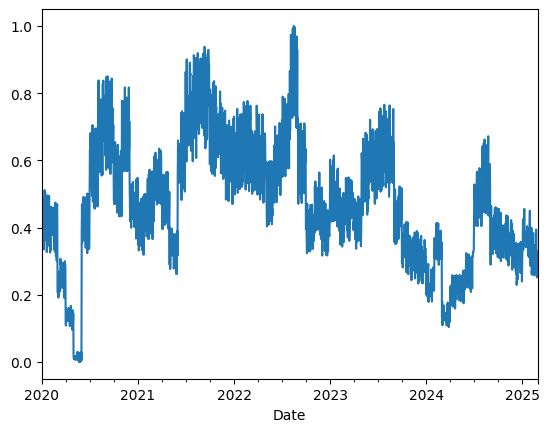

In [7]:
doluluk = df["Doluluk"]
doluluk.plot()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1886 entries, 2020-01-01 to 2025-02-28
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Doluluk  1886 non-null   float64
dtypes: float64(1)
memory usage: 29.5 KB


In [9]:
train_size =  int((len(df)) * 0.7)
val_size = int((len(df)) * 0.1)

train = df.iloc[:train_size]
value = df.iloc[train_size:train_size + val_size:]
test = df.iloc[train_size + val_size:]

train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2020-01-01 to 2023-08-12
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Doluluk  1320 non-null   float64
dtypes: float64(1)
memory usage: 20.6 KB


In [10]:
len(train), len(value), len(test)

(1320, 188, 378)

In [11]:
def df_to_X_y(df, window_size=30):
    df_as_np = df.to_numpy()  
    X, y = [], []

    for i in range(len(df_as_np) - window_size):
        row = df_as_np[i:i+window_size]  
        X.append(row)
        label = df_as_np[i+window_size]  
        y.append(label)

    return np.array(X), np.array(y)  

In [12]:
WINDOW_SIZE = 30
X_train, y_train = df_to_X_y(train, WINDOW_SIZE)
X_val, y_val = df_to_X_y(value, WINDOW_SIZE)
X_test, y_test = df_to_X_y(test, WINDOW_SIZE)


X_train.shape, y_train.shape,  X_val.shape, y_val.shape,X_test.shape, y_test.shape

((1290, 30, 1), (1290, 1), (158, 30, 1), (158, 1), (348, 30, 1), (348, 1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()
model.add(InputLayer((30,1)))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

In [15]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[RootMeanSquaredError()])

In [16]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0876 - root_mean_squared_error: 0.2823 - val_loss: 0.0061 - val_root_mean_squared_error: 0.0778
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - root_mean_squared_error: 0.1066 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0668
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - root_mean_squared_error: 0.1009 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0530
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0548
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0089 - root_mean_squared_error: 0.0944 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0519
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss

In [17]:
test_predictions = model.predict(X_test).flatten()
test_results= pd.DataFrame(data={'Test_Predictions':test_predictions, 'Actuals':y_test.flatten()})
test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


,Test_Predictions,Actuals
0,0.130346,0.135280
1,0.132414,0.108440
2,0.127168,0.157825
3,0.136863,0.170336
4,0.149855,0.109353
...,...,...
343,0.314617,0.331857
344,0.319656,0.269011
345,0.306394,0.251388
346,0.290210,0.266315


In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)
mse, rmse, mae, r2


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


(0.002658052953870837,
 0.05155630857490514,
 0.041779485531555825,
 0.7850205807169728)

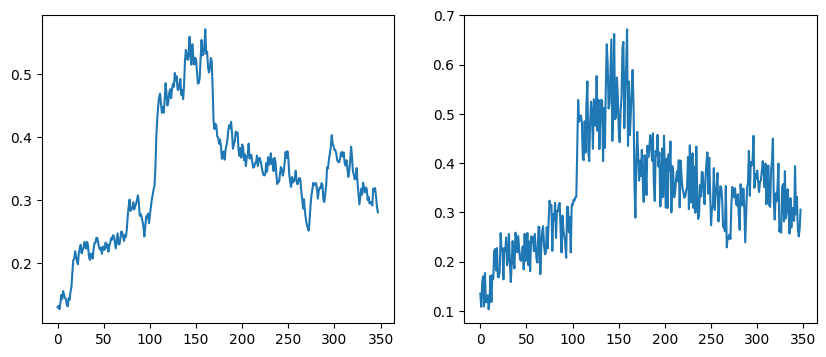

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(test_results['Test_Predictions'])
plt.subplot(1,2,2)
plt.plot(test_results['Actuals'])

In [20]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [21]:
test_results.head()

,Test_Predictions,Actuals
0,0.130346,0.135280
1,0.132414,0.108440
2,0.127168,0.157825
3,0.136863,0.170336
4,0.149855,0.109353


In [28]:
future_days = WINDOW_SIZE     
future_predictions = []

last_30_days = df['Doluluk'].values[-WINDOW_SIZE:]  
current_input = last_30_days.reshape(1, WINDOW_SIZE, 1) 

for _ in range(future_days):
    next_prediction = model.predict(current_input)[0, 0]  
    future_predictions.append(next_prediction)  
    
    last_30_days = np.append(last_30_days[1:], next_prediction)
    current_input = last_30_days.reshape(1, WINDOW_SIZE, 1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)) 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

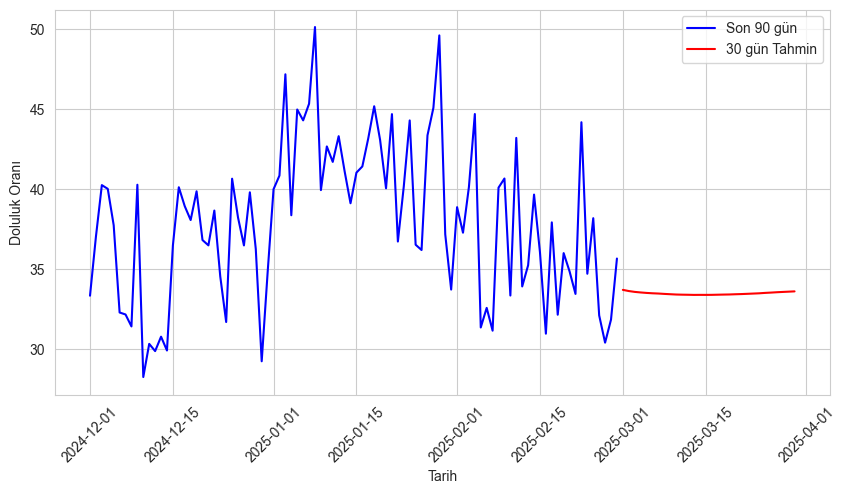

In [68]:




plt.figure(figsize=(10, 5))
plt.plot(df.index[-90:], scaler.inverse_transform(df['Doluluk'].iloc[-90:].values.reshape(-1, 1)), label="Son 90 gün", color="blue")
plt.plot(pd.date_range(start=df.index[-1], periods=future_days + 1, freq='D')[1:], future_predictions, label="30 gün Tahmin", color="red")


plt.legend()
plt.xlabel("Tarih")
plt.ylabel("Doluluk Oranı")
plt.xticks(rotation=45)
plt.grid(True)



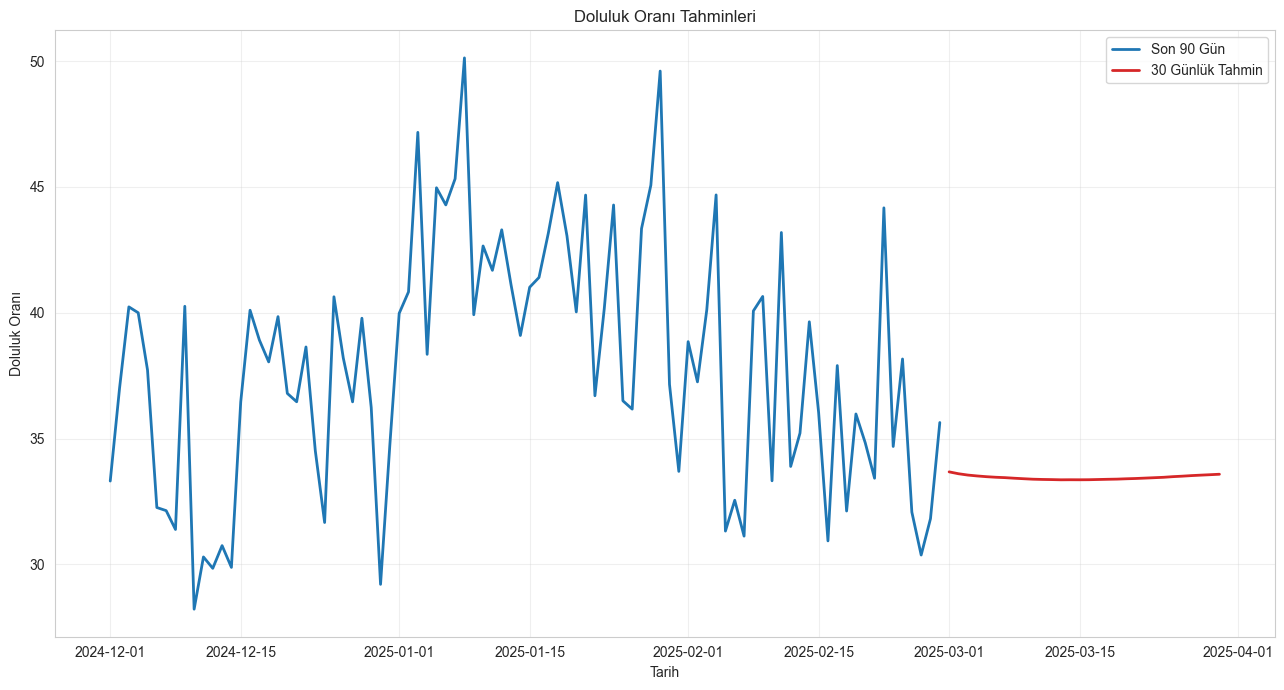

In [67]:
import seaborn as sns
import matplotlib.dates as mdates

plt.figure(figsize=(13, 7))

sns.lineplot(x=df.index[-90:], 
             y=scaler.inverse_transform(df['Doluluk'].iloc[-90:].values.reshape(-1, 1)).flatten(),
             color="#1f77b4",
             linewidth=2,
             label="Son 90 Gün")

sns.lineplot(x=pd.date_range(start=df.index[-1], periods=future_days + 1, freq='D')[1:],
             y=future_predictions.flatten(),
             color="#d62728",
             linewidth=2,
             label=f"{future_days} Günlük Tahmin")

plt.title("Doluluk Oranı Tahminleri",)
plt.xlabel("Tarih",)
plt.ylabel("Doluluk Oranı")


plt.grid(True, alpha=0.3)
plt.tight_layout()